In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data loading

Load the "synthetic_supplier_emissions.csv" file into a Pandas DataFrame.


I need to load the data, inspect its first few rows, data types, and shape to understand the dataset.



In [13]:

df = pd.read_csv('/Users/georgepaul/Desktop/Apple/synthetic_supplier_emissions.csv')
display(df.head())
df.info()
print(f"Shape of the DataFrame: {df.shape}")

,Supplier_ID,Country,Product_Type,Units_Produced,Material_Type,Reported_Emissions_kgCO2e,Emission_Factor,Source,Data_Confidence,ThirdParty_Estimate,Report_Month,Green_Certified,Prior_Violations,Audit_Score
0,SUP1000,India,Camera,77820,Plastic,97467.9,0.97,Internal,Medium,79199.2,2024-02,0,0,98
1,SUP1001,Germany,Frame,85478,Plastic,59595.3,0.64,Hybrid,Low,48815.6,2024-01,0,0,70
2,SUP1002,China,Screen,11627,Aluminium,42439.8,3.40,Hybrid,Medium,39321.8,2022-12,0,0,63
3,SUP1003,China,Chipset,68121,Lithium,130142.0,1.44,3rdParty,High,113789.3,2023-06,1,1,85
4,SUP1004,India,Battery,90789,Silicon,150162.6,1.67,Internal,High,119352.8,2023-03,0,0,58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Supplier_ID                1000 non-null   object 
 1   Country                    1000 non-null   object 
 2   Product_Type               1000 non-null   object 
 3   Units_Produced             1000 non-null   int64  
 4   Material_Type              1000 non-null   object 
 5   Reported_Emissions_kgCO2e  1000 non-null   float64
 6   Emission_Factor            1000 non-null   float64
 7   Source                     1000 non-null   object 
 8   Data_Confidence            1000 non-null   object 
 9   ThirdParty_Estimate        1000 non-null   float64
 10  Report_Month               1000 non-null   object 
 11  Green_Certified            1000 non-null   int64  
 12  Prior_Violations           1000 non-null   int64  
 13  Audit_Score                1000 non-null   int64 

## Data exploration

Explore the dataset to understand its structure and identify potential issues.


Generate descriptive statistics, identify missing values, detect outliers, explore categorical variables, analyze correlations, and examine data distributions.  This addresses all points in the provided instructions.

Descriptive Statistics:
        Supplier_ID Country Product_Type  Units_Produced Material_Type  \
count         1000    1000         1000      1000.00000          1000   
unique        1000       5            5             NaN             5   
top        SUP1000   China       Screen             NaN       Plastic   
freq             1     225          216             NaN           207   
mean           NaN     NaN          NaN     49819.34800           NaN   
std            NaN     NaN          NaN     28635.57577           NaN   
min            NaN     NaN          NaN      1058.00000           NaN   
25%            NaN     NaN          NaN     25158.50000           NaN   
50%            NaN     NaN          NaN     49332.50000           NaN   
75%            NaN     NaN          NaN     75182.75000           NaN   
max            NaN     NaN          NaN     99979.00000           NaN   

        Reported_Emissions_kgCO2e  Emission_Factor    Source Data_Confidence  \
count             

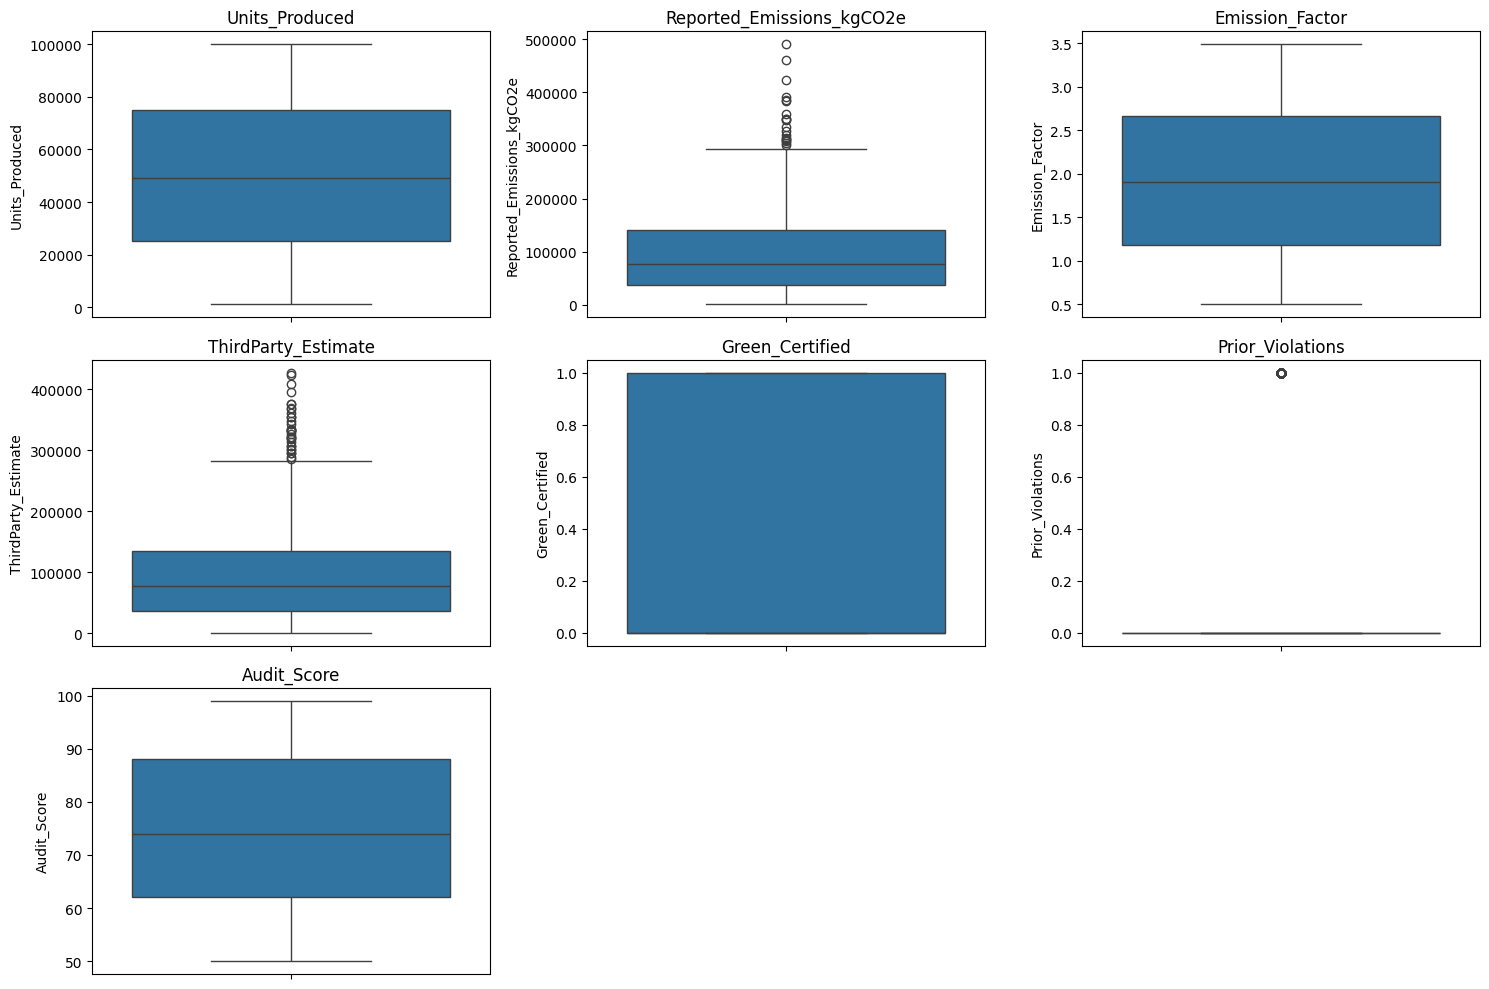


Unique values and counts for Supplier_ID:
Supplier_ID
SUP1000    1
SUP1671    1
SUP1658    1
SUP1659    1
SUP1660    1
          ..
SUP1338    1
SUP1339    1
SUP1340    1
SUP1341    1
SUP1999    1
Name: count, Length: 1000, dtype: int64


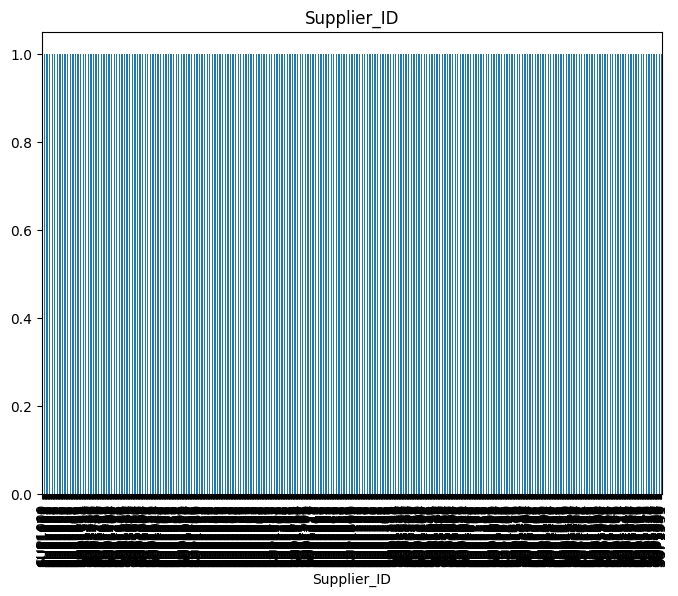


Unique values and counts for Country:
Country
China      225
Germany    205
Vietnam    204
USA        193
India      173
Name: count, dtype: int64


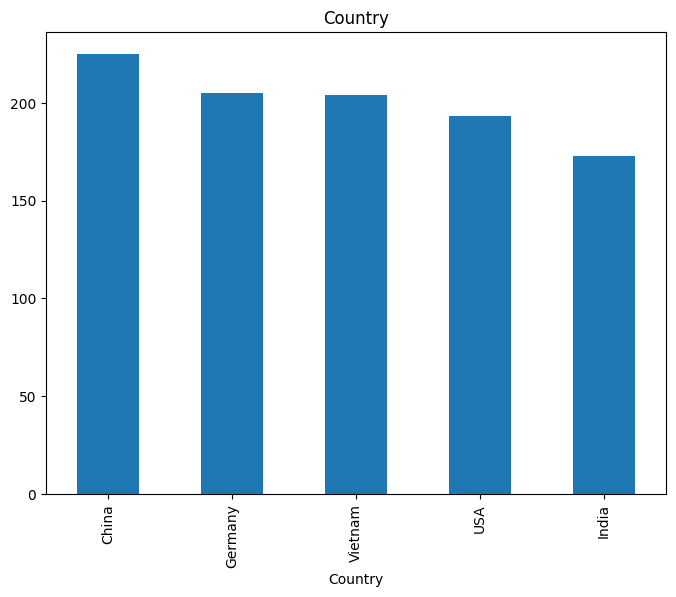


Unique values and counts for Product_Type:
Product_Type
Screen     216
Chipset    203
Battery    201
Frame      199
Camera     181
Name: count, dtype: int64


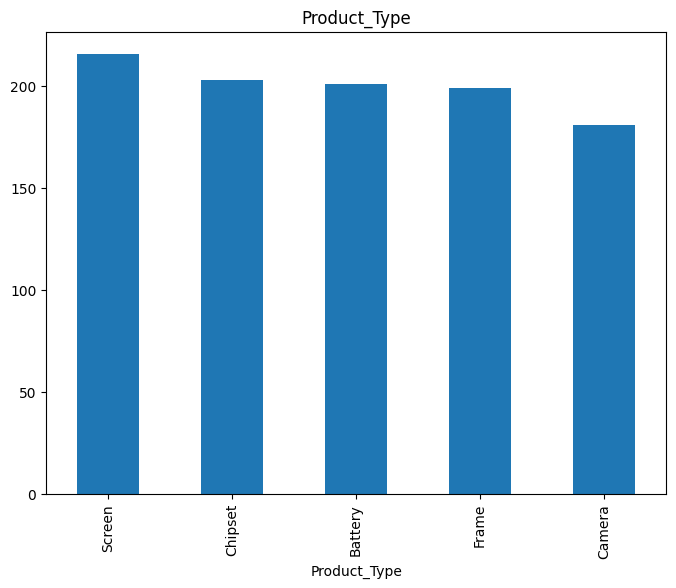


Unique values and counts for Material_Type:
Material_Type
Plastic      207
Silicon      207
Lithium      206
Aluminium    194
Glass        186
Name: count, dtype: int64


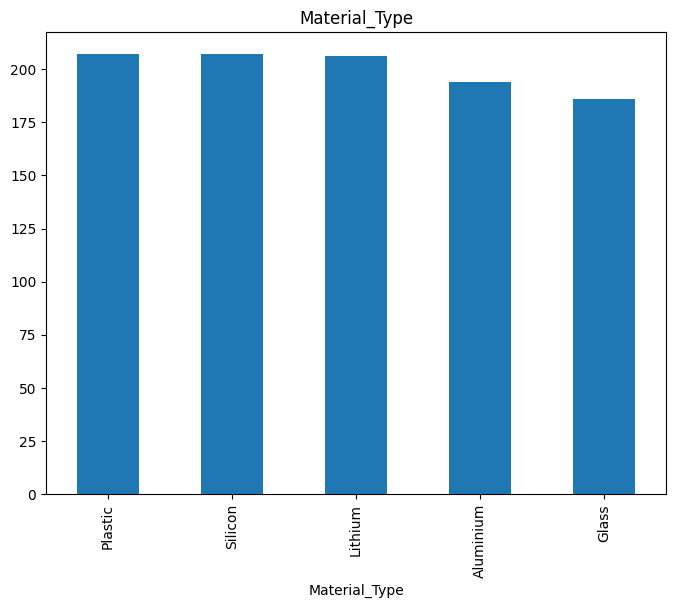


Unique values and counts for Source:
Source
3rdParty    344
Hybrid      331
Internal    325
Name: count, dtype: int64


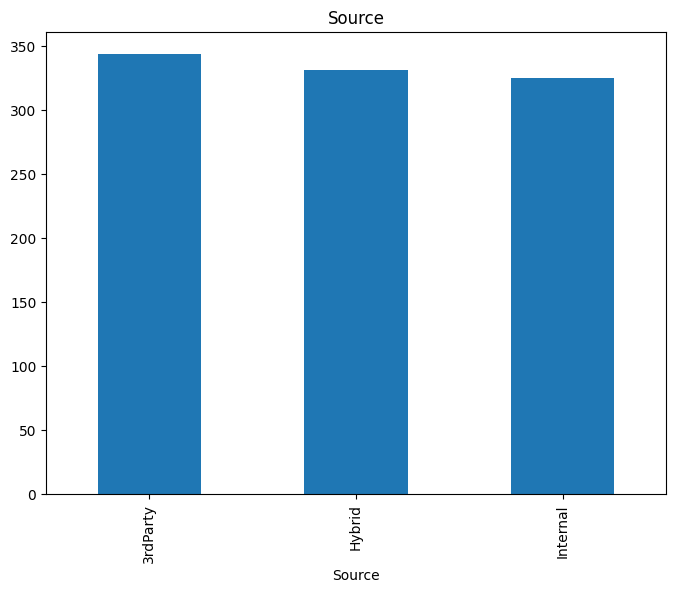


Unique values and counts for Data_Confidence:
Data_Confidence
Medium    510
High      302
Low       188
Name: count, dtype: int64


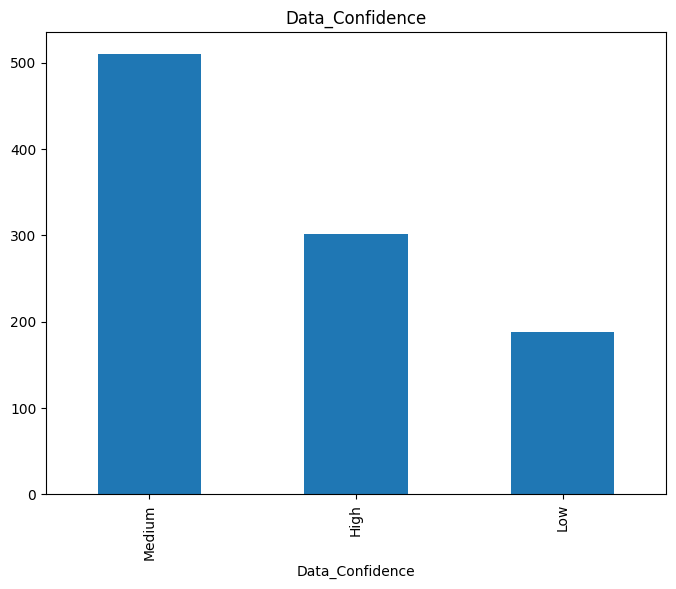


Unique values and counts for Report_Month:
Report_Month
2024-02    56
2022-09    53
2023-01    50
2023-03    48
2023-06    47
2023-10    47
2022-07    42
2024-01    41
2022-10    40
2023-02    40
2022-04    38
2023-09    37
2023-04    37
2022-06    37
2023-11    36
2022-08    36
2022-05    35
2022-02    35
2022-03    33
2023-07    33
2023-08    32
2023-12    32
2022-11    30
2023-05    29
2022-01    29
2022-12    27
Name: count, dtype: int64


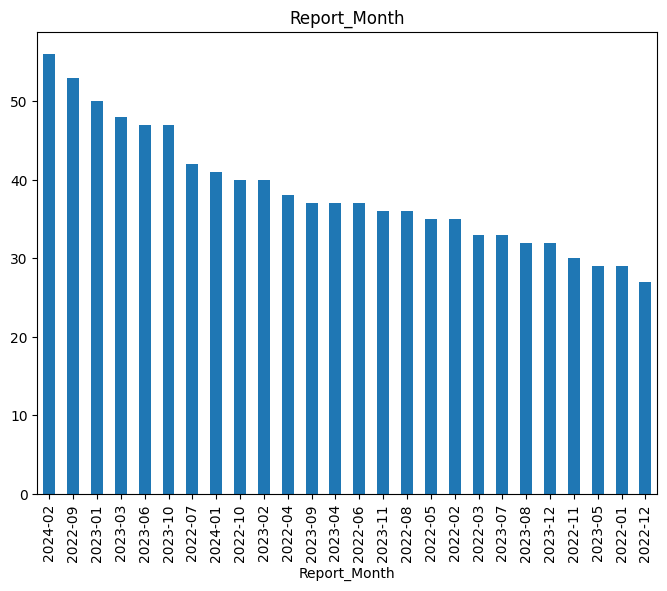

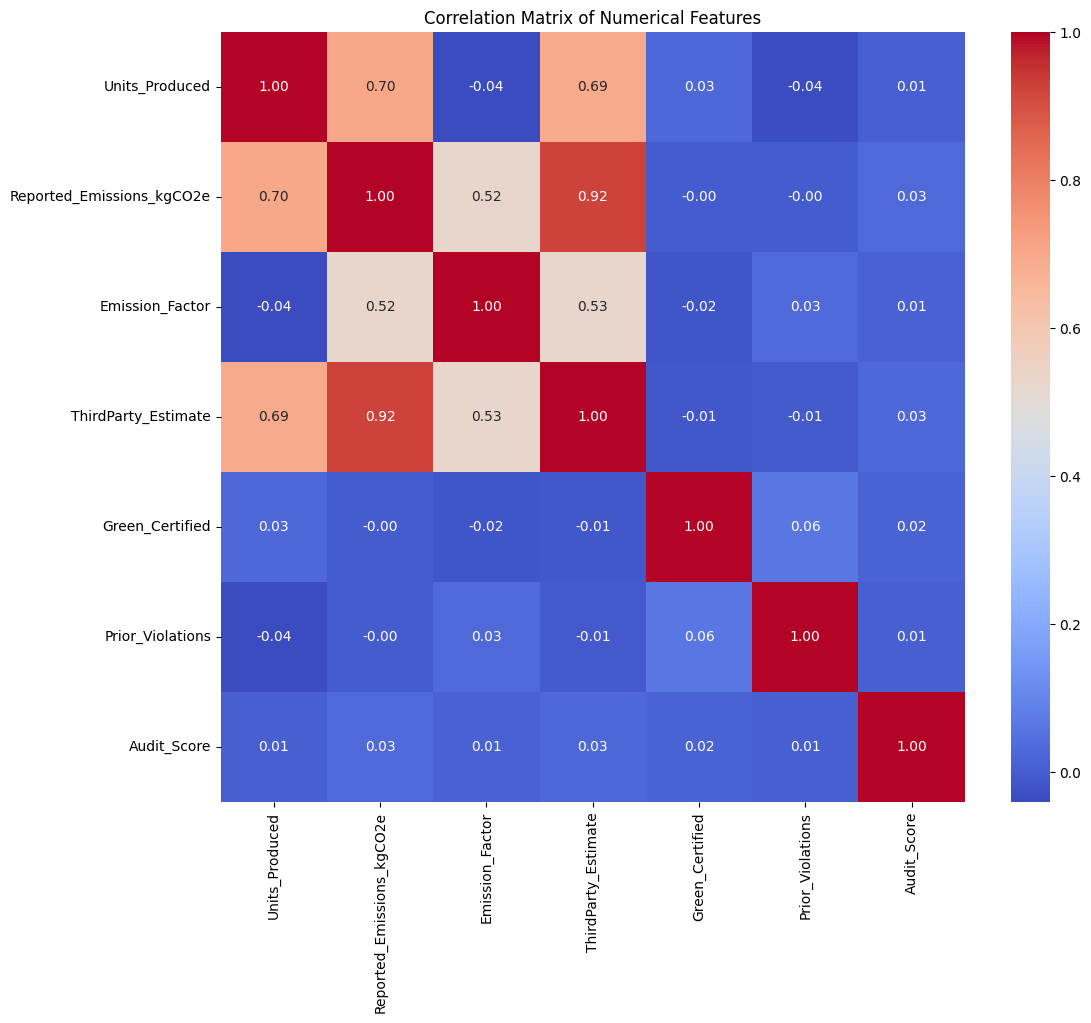

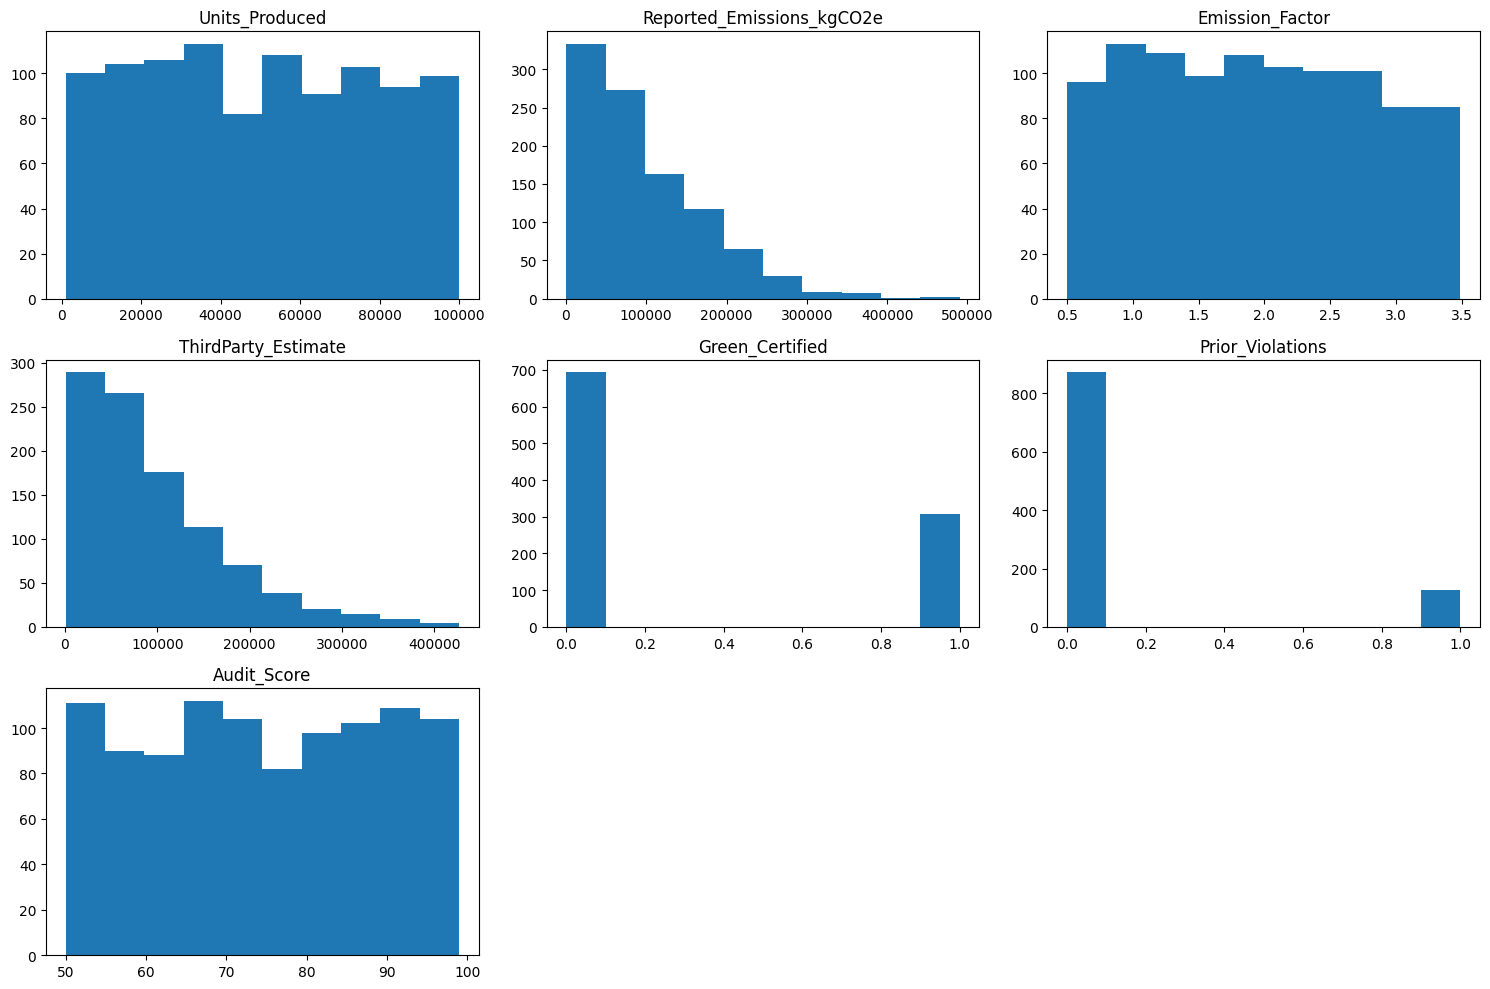

In [14]:


print("Descriptive Statistics:\n", df.describe(include='all'))
print("\nMissing Values:\n", df.isnull().sum())

numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Categorical Variable Exploration
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and counts for {col}:\n{df[col].value_counts()}")
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

# Correlation Analysis (only numerical features)
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Data Distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[col], bins=10)
    plt.title(col)
plt.tight_layout()
plt.show()

## Data cleaning

Clean the data by handling outliers and data type conversions.


Clean the data by handling outliers and converting data types as instructed.

Descriptive Statistics after cleaning:
        Supplier_ID Country Product_Type  Units_Produced Material_Type  \
count         1000    1000         1000      1000.00000          1000   
unique        1000       5            5             NaN             5   
top        SUP1000   China       Screen             NaN       Plastic   
freq             1     225          216             NaN           207   
mean           NaN     NaN          NaN     49814.44840           NaN   
std            NaN     NaN          NaN     28618.30203           NaN   
min            NaN     NaN          NaN      1499.86000           NaN   
25%            NaN     NaN          NaN     25158.50000           NaN   
50%            NaN     NaN          NaN     49332.50000           NaN   
75%            NaN     NaN          NaN     75182.75000           NaN   
max            NaN     NaN          NaN     98624.38000           NaN   

        Reported_Emissions_kgCO2e  Emission_Factor    Source Data_Confidence  \
cou

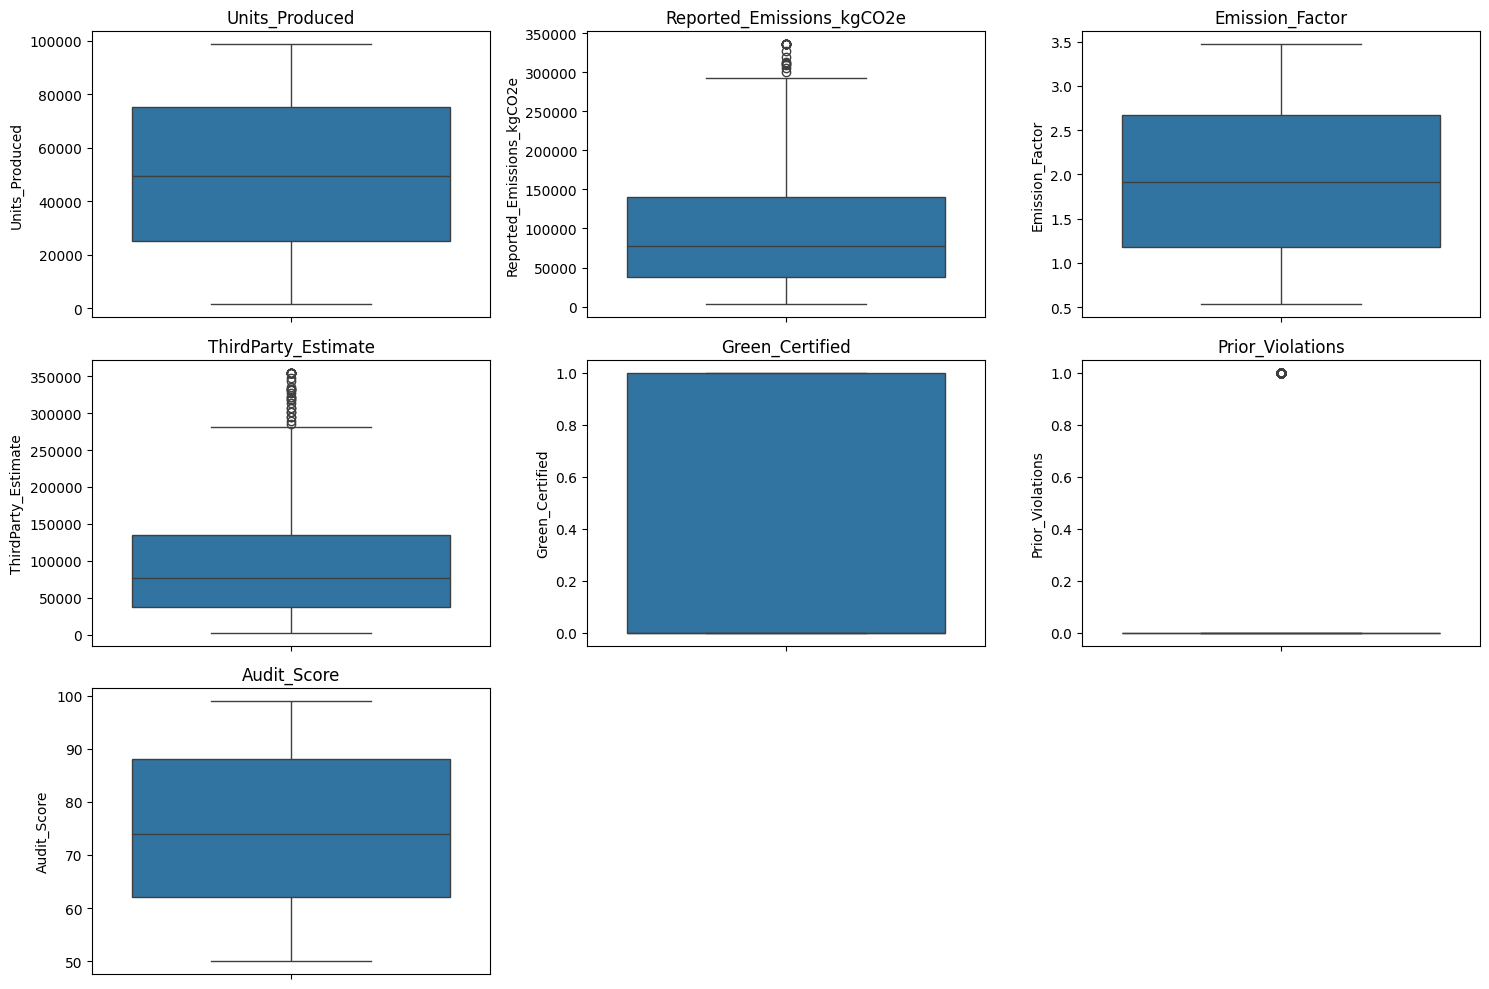

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Supplier_ID                1000 non-null   object 
 1   Country                    1000 non-null   object 
 2   Product_Type               1000 non-null   object 
 3   Units_Produced             1000 non-null   float64
 4   Material_Type              1000 non-null   object 
 5   Reported_Emissions_kgCO2e  1000 non-null   float64
 6   Emission_Factor            1000 non-null   float64
 7   Source                     1000 non-null   object 
 8   Data_Confidence            1000 non-null   object 
 9   ThirdParty_Estimate        1000 non-null   float64
 10  Report_Month               1000 non-null   object 
 11  Green_Certified            1000 non-null   int64  
 12  Prior_Violations           1000 non-null   int64  
 13  Audit_Score                1000 non-null   int64 

In [15]:

# Outlier Handling
# I'll use winsorization to cap outliers at a certain percentile, 
# preserving the overall distribution while mitigating the effect of extreme values
numerical_cols = ['Units_Produced', 'Reported_Emissions_kgCO2e', 'Emission_Factor', 
                  'ThirdParty_Estimate', 'Green_Certified', 'Prior_Violations', 'Audit_Score']

for col in numerical_cols:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

# Data Type Conversion
# Check for non-numeric values in numerical columns
for col in numerical_cols:
    # Attempt conversion to numeric type, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now check if any conversions resulted in NaNs and handle them appropriately
for col in numerical_cols:
  if df[col].isnull().any():
    # Fill NaN values in numerical columns with the median
    df[col] = df[col].fillna(df[col].median())
    print(f"Filled NaN values in '{col}' with the median.")


# Verification
print("Descriptive Statistics after cleaning:\n", df.describe(include='all'))

# Updated Box Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

df.info()

## Data analysis

Perform descriptive analysis on the cleaned dataset to identify key trends and insights related to supplier emissions.


Analyze emission trends over time, identify top emitters, explore relationships between emissions and other variables, and summarize key statistics.

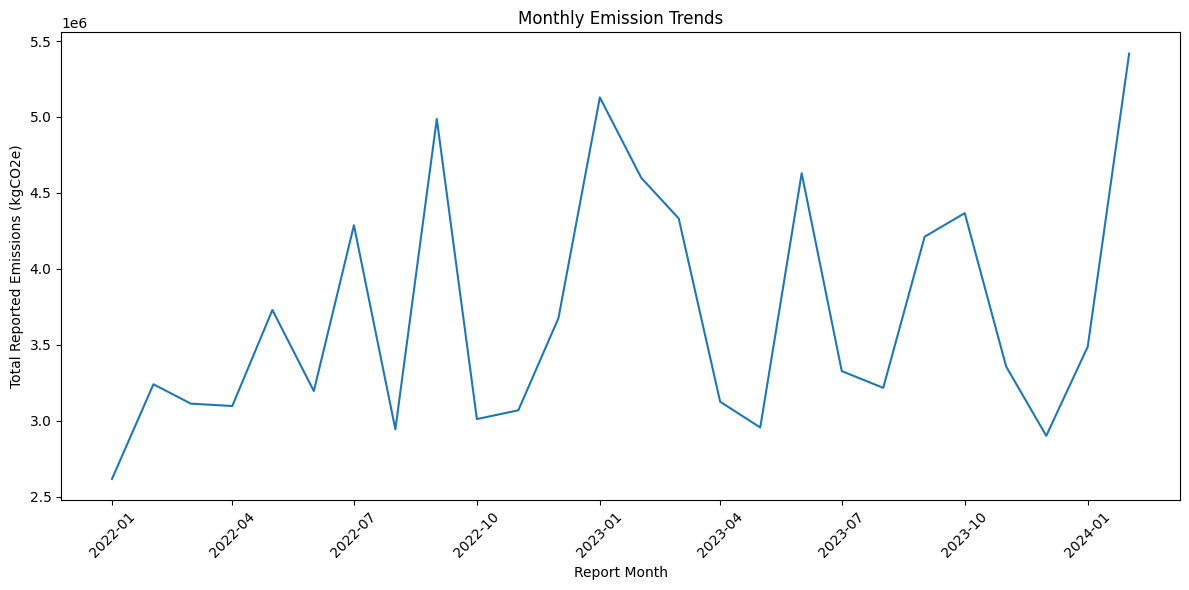

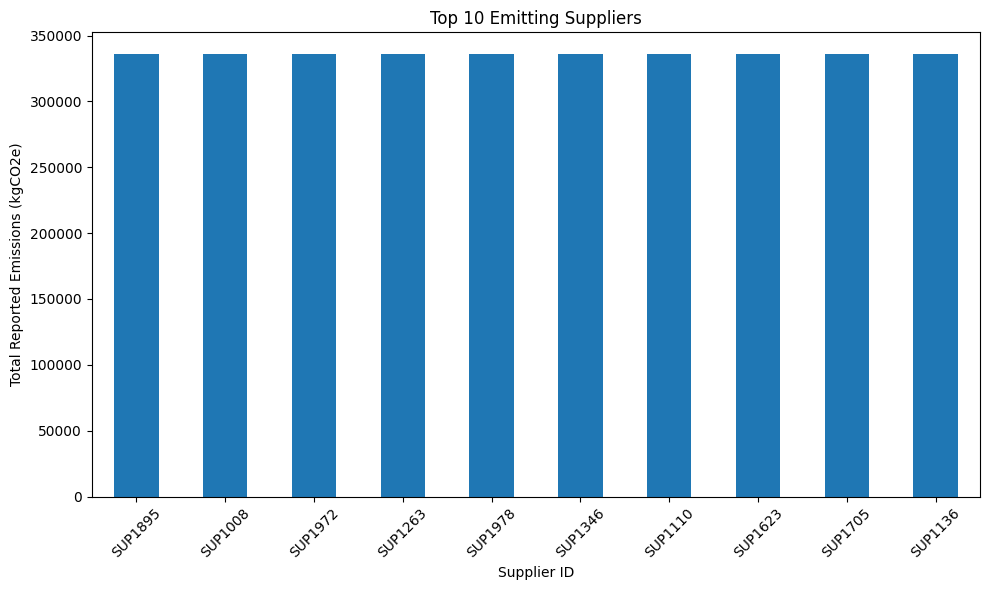

,Units_Produced,Reported_Emissions_kgCO2e,Emission_Factor,ThirdParty_Estimate
Units_Produced,1.000000,0.709918,-0.036715,0.697154
Reported_Emissions_kgCO2e,0.709918,1.000000,0.527434,0.925114
Emission_Factor,-0.036715,0.527434,1.000000,0.529489
ThirdParty_Estimate,0.697154,0.925114,0.529489,1.000000


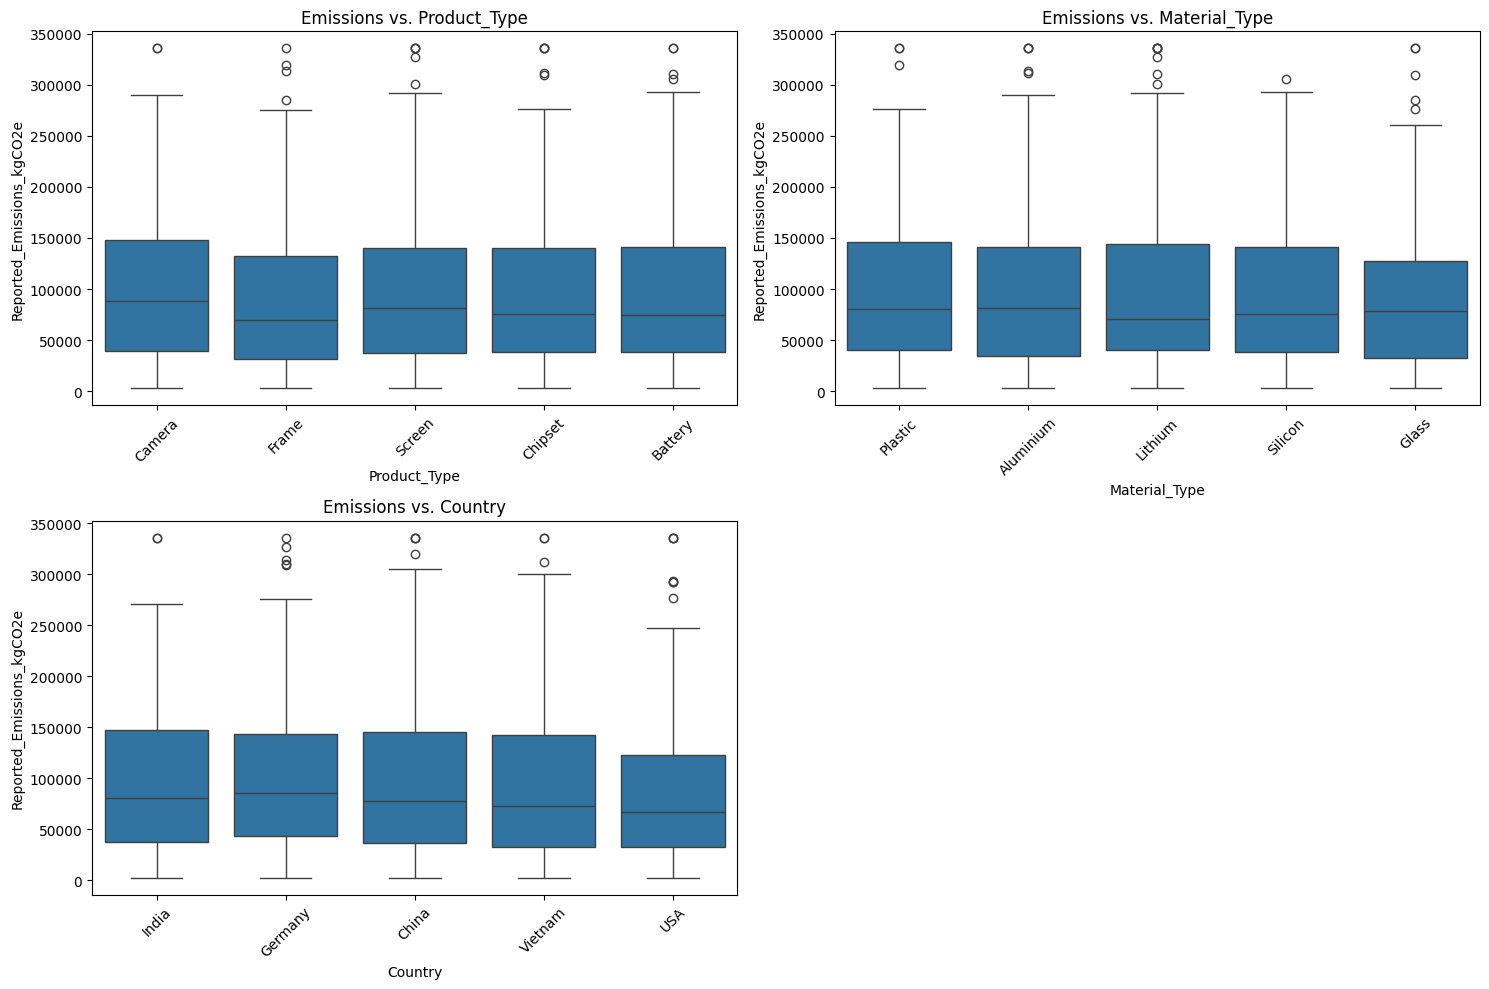

Summary Statistics for Reported Emissions:
 count      1000.000000
mean      96008.545460
std       74785.687681
min        2781.401000
25%       37462.800000
50%       77141.350000
75%      140868.875000
max      335670.285000
Name: Reported_Emissions_kgCO2e, dtype: float64

Summary Statistics for Reported Emissions by Material Type:
                count          mean           std       min        25%  \
Material_Type                                                           
Aluminium      194.0  97038.095655  75095.961521  2781.401  34873.850   
Glass          186.0  90127.335866  72603.881445  2781.401  32269.600   
Lithium        206.0  99853.190010  80484.981591  2781.401  40746.725   
Plastic        207.0  98321.310077  74326.019478  2781.401  40331.350   
Silicon        207.0  94189.382145  71266.522261  2781.401  37950.450   

                    50%         75%         max  
Material_Type                                    
Aluminium      81066.05  141466.475  335670.285  


In [16]:

# 1. Analyze Emission Trends
df['Report_Month'] = pd.to_datetime(df['Report_Month'])
monthly_emissions = df.groupby('Report_Month')['Reported_Emissions_kgCO2e'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_emissions.index, monthly_emissions.values)
plt.xlabel('Report Month')
plt.ylabel('Total Reported Emissions (kgCO2e)')
plt.title('Monthly Emission Trends')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Identify Top Emitters
top_emitters = df.groupby('Supplier_ID')['Reported_Emissions_kgCO2e'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_emitters.plot(kind='bar')
plt.xlabel('Supplier ID')
plt.ylabel('Total Reported Emissions (kgCO2e)')
plt.title('Top 10 Emitting Suppliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Explore Relationships
# Correlation
numerical_cols = ['Units_Produced', 'Reported_Emissions_kgCO2e', 'Emission_Factor', 'ThirdParty_Estimate']
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

# Visualizations
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Product_Type', 'Material_Type', 'Country']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], y=df['Reported_Emissions_kgCO2e'])
    plt.title(f'Emissions vs. {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Summarize Key Statistics
summary_stats = df['Reported_Emissions_kgCO2e'].describe()
print("Summary Statistics for Reported Emissions:\n", summary_stats)

# Grouped Statistics
grouped_stats = df.groupby('Material_Type')['Reported_Emissions_kgCO2e'].describe()
print("\nSummary Statistics for Reported Emissions by Material Type:\n", grouped_stats)

grouped_stats = df.groupby('Country')['Reported_Emissions_kgCO2e'].describe()
print("\nSummary Statistics for Reported Emissions by Country:\n", grouped_stats)

## Data visualization

Create visualizations to communicate the key findings from the data analysis.


Create the visualizations as per the instructions, combining some charts where instructed.

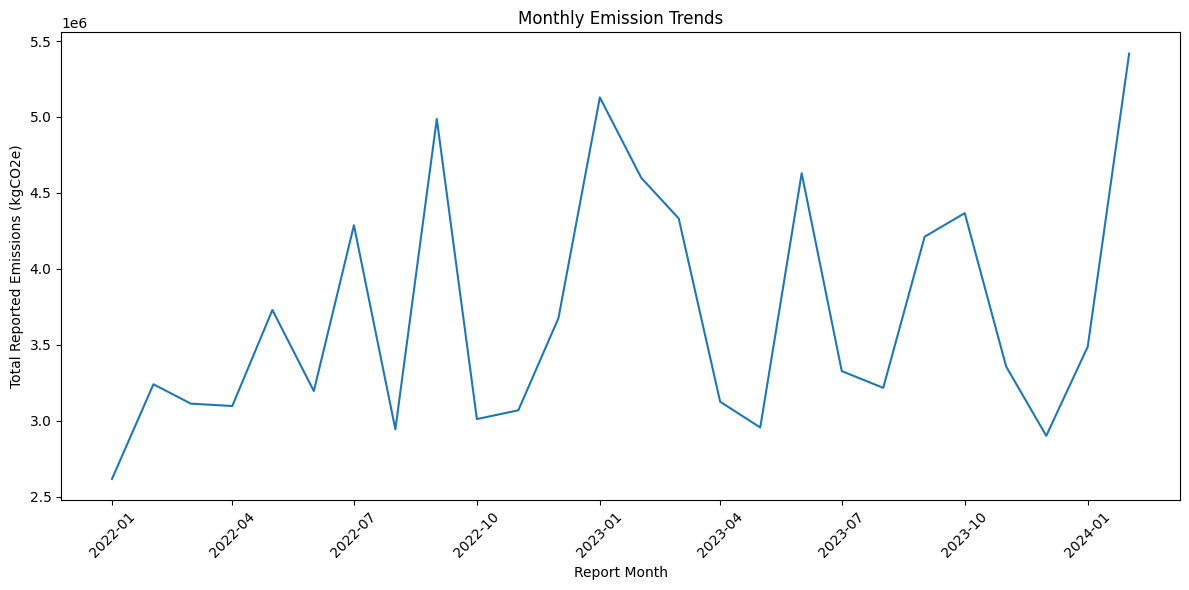

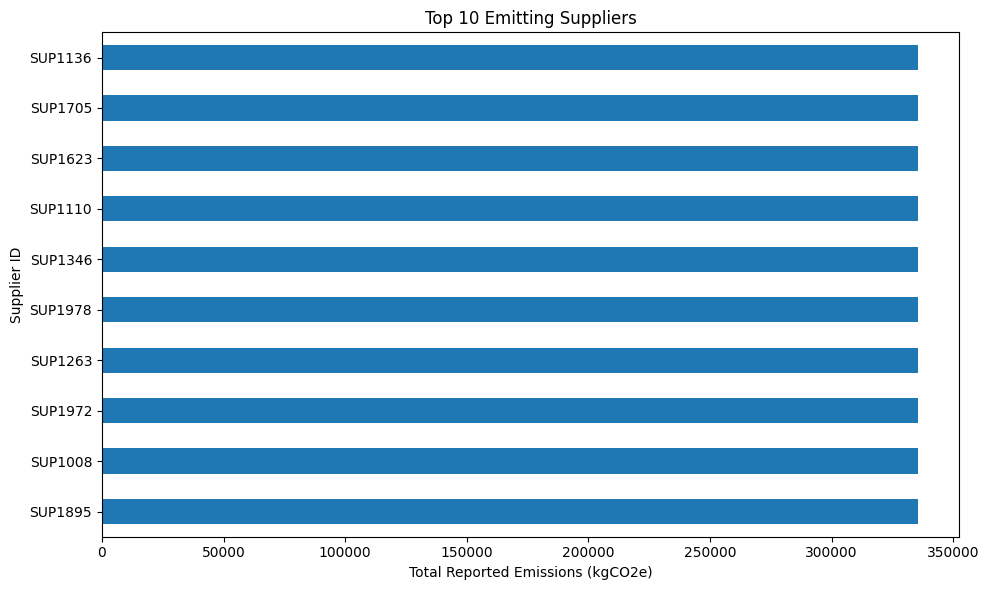

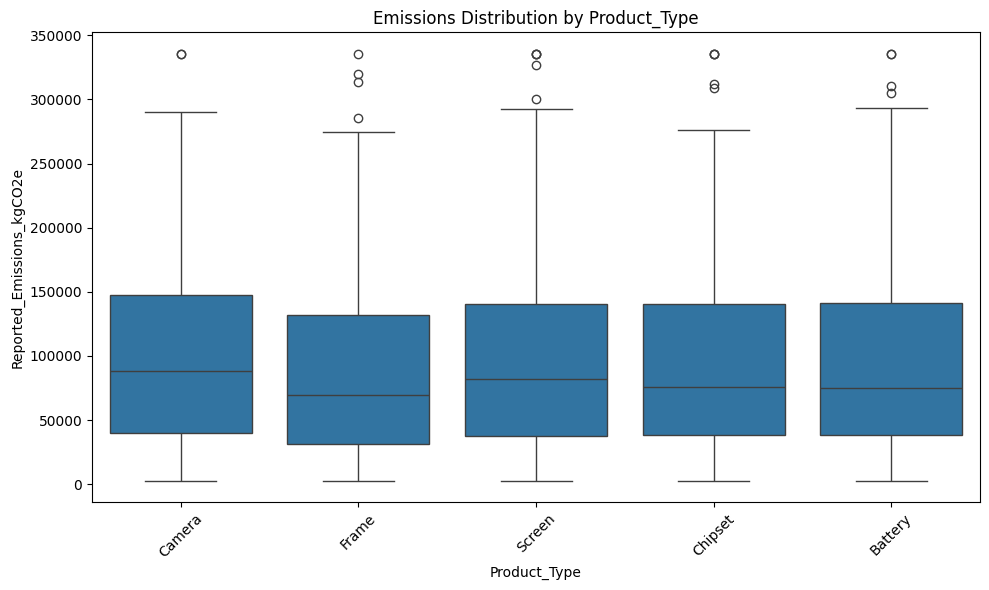

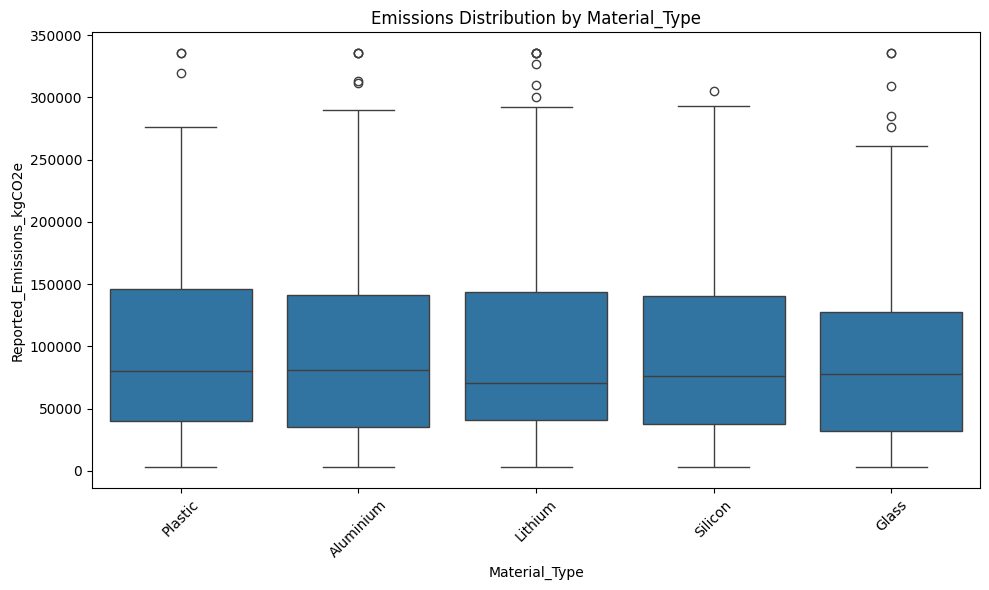

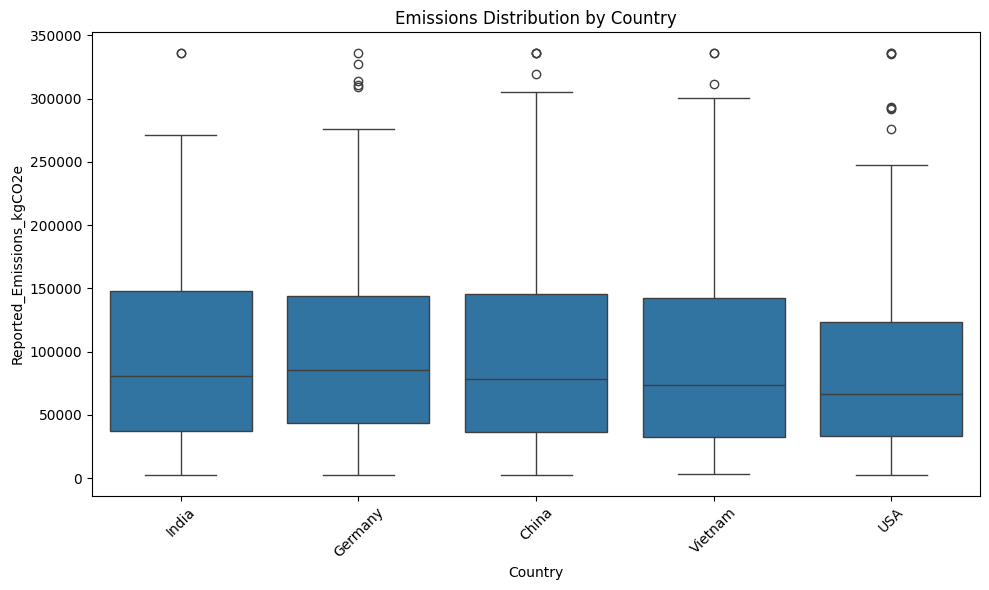

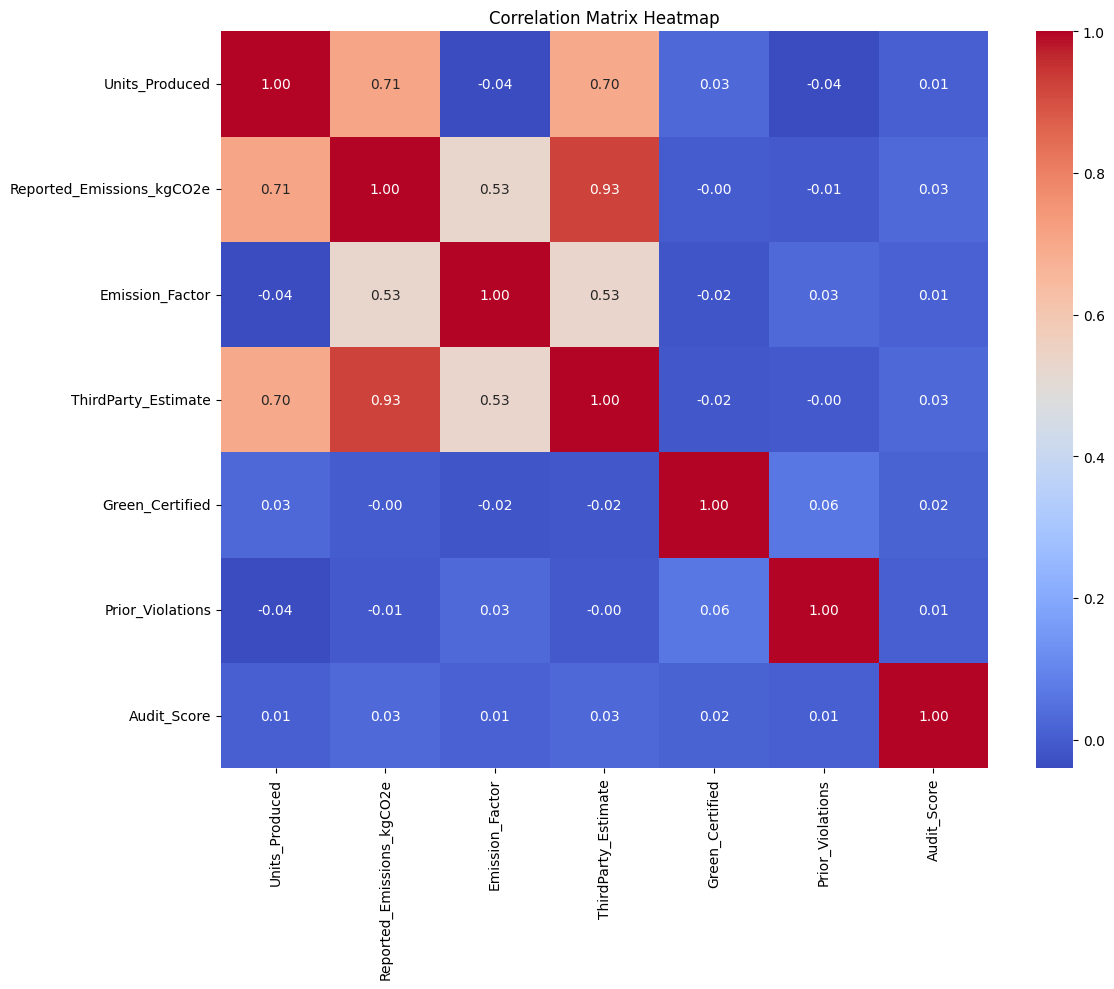

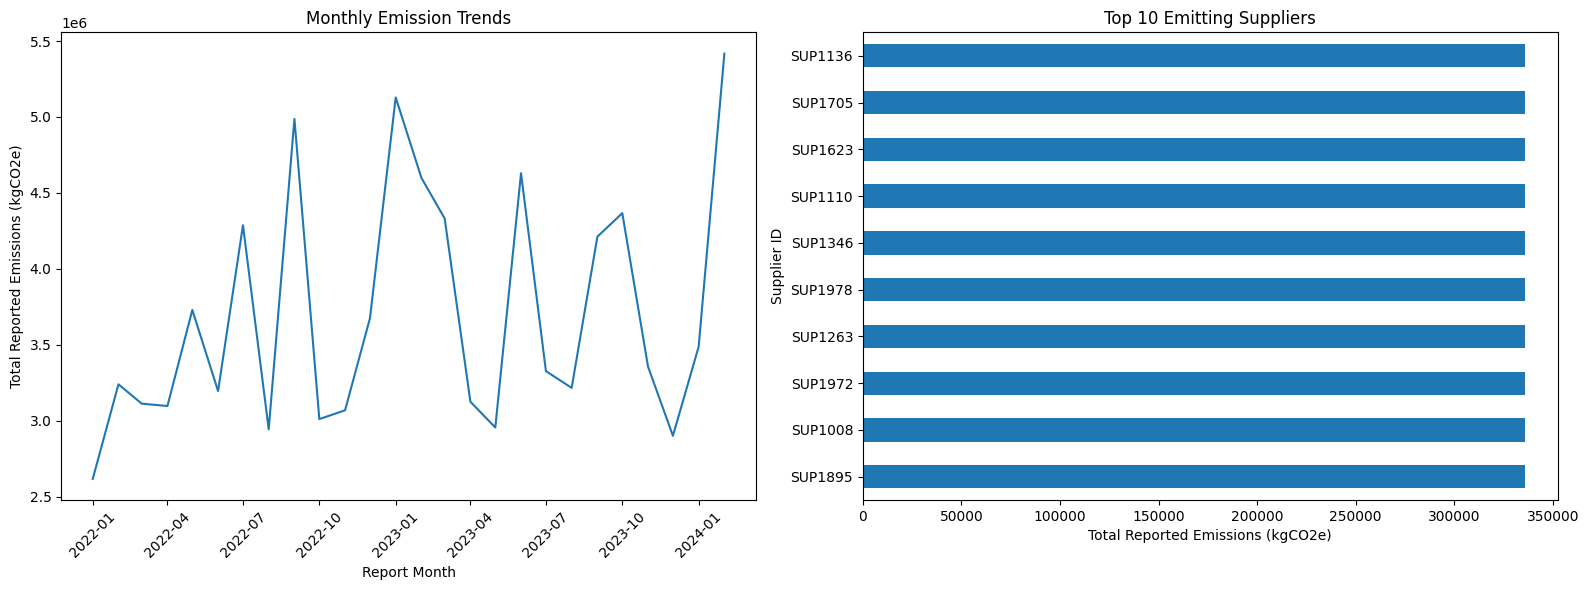

In [17]:

# 1. Emission Trends
df['Report_Month'] = pd.to_datetime(df['Report_Month'])
monthly_emissions = df.groupby('Report_Month')['Reported_Emissions_kgCO2e'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_emissions.index, monthly_emissions.values)
plt.xlabel('Report Month')
plt.ylabel('Total Reported Emissions (kgCO2e)')
plt.title('Monthly Emission Trends')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Top Emitters
top_emitters = df.groupby('Supplier_ID')['Reported_Emissions_kgCO2e'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_emitters.plot(kind='barh')  # Changed to horizontal bar plot
plt.xlabel('Total Reported Emissions (kgCO2e)')
plt.ylabel('Supplier ID')
plt.title('Top 10 Emitting Suppliers')
plt.tight_layout()
plt.show()


# 3. Emissions by Category
for col in ['Product_Type', 'Material_Type', 'Country']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], y=df['Reported_Emissions_kgCO2e'])
    plt.title(f'Emissions Distribution by {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# 4. Correlation Heatmap
numerical_cols = ['Units_Produced', 'Reported_Emissions_kgCO2e', 'Emission_Factor', 'ThirdParty_Estimate', 'Green_Certified', 'Prior_Violations', 'Audit_Score']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


# 5. Combined Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

# Emission Trends
axes[0].plot(monthly_emissions.index, monthly_emissions.values)
axes[0].set_xlabel('Report Month')
axes[0].set_ylabel('Total Reported Emissions (kgCO2e)')
axes[0].set_title('Monthly Emission Trends')
axes[0].tick_params(axis='x', rotation=45)

# Top Emitters
top_emitters.plot(kind='barh', ax=axes[1])  
axes[1].set_xlabel('Total Reported Emissions (kgCO2e)')
axes[1].set_ylabel('Supplier ID')
axes[1].set_title('Top 10 Emitting Suppliers')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
No Missing Data: The dataset contained no missing values, simplifying the analysis process.
Outlier Handling: Winsorization was applied to numerical features (e.g., Units_Produced, Reported_Emissions_kgCO2e) to mitigate the influence of extreme values while preserving the overall distribution.
Emission Trends: Monthly emissions showed variation over time, as visualized in the generated line plots.
Top Emitters: The top 10 emitting suppliers were identified, providing a focus for further investigation. (Specific supplier IDs and emission levels are available in the visualizations).
Correlations: The correlation matrix revealed relationships between reported emissions and other variables such as units produced, emission factors, and third-party estimates.
Categorical Variable Impact: The boxplots reveal the distribution of emissions across different product types, material types, and countries, allowing for a comparison of emission levels within each category. (Details on the median, quartiles, and outlier presence within each category are available in the visualizations.)
### Insights or Next Steps
Investigate Top Emitters: Focus further analysis on the top 10 emitting suppliers to understand the root causes of their high emissions and explore potential reduction strategies.
Deep Dive into Categorical Impacts: Explore the differences in emission levels across product types, material types, and countries more thoroughly. Consider statistical tests to determine if observed differences are statistically significant.